In [1]:
import pandas as pd

In [2]:
df = pd.concat(map(pd.read_csv, ['ais_vessel_data.csv']))

In [3]:
df.shape

(1000000, 11)

In [4]:
df.head()

,id,timestamp,vessel_id,latitude,longitude,velocity,heading,cog,vessel_name,destination,type
0,4549409,2025-02-26 07:31:58.351501,276672000,59.515667,23.113833,16.6,107.0,106.0,STAR I,EE PLS >< SE KPS,60
1,4549408,2025-02-26 07:31:58.221623,230992590,60.117938,22.022163,9.0,23.0,25.4,FALKO,NAGU SODRA RUTT,60
2,4549407,2025-02-26 07:31:58.091718,276342000,59.455955,24.701318,0.0,511.0,4.7,VIIKING,LAHESUU,90
3,4549406,2025-02-26 07:31:57.998092,304108000,59.534797,23.580890,10.4,65.0,66.0,KAREN,RULED,70
4,4549405,2025-02-26 07:31:57.894356,230991010,60.436925,22.238740,0.0,511.0,232.8,ANYA,TURKU,90


In [5]:
df = df.loc[(df['vessel_id'] >= 20), ["vessel_id","timestamp","latitude","longitude","cog","vessel_name","type"]]

In [6]:
df.shape

(1000000, 7)

In [7]:
df_60 = df[df.type == 60]

In [8]:
df_60.shape

(365333, 7)

In [9]:
df_60 = df_60.dropna()

In [10]:
df_60.shape

(365333, 7)

In [11]:
df_60 = df_60.drop_duplicates()

In [12]:
df_60.shape

(365333, 7)

In [13]:
df_60 = df_60.reset_index(drop=True)

In [14]:
df_60.shape

(365333, 7)

In [15]:
df_60.isnull().sum()

vessel_id      0
timestamp      0
latitude       0
longitude      0
cog            0
vessel_name    0
type           0
dtype: int64

In [16]:
df_60['latitude'].min()

59.000117

In [17]:
df_60['latitude'].max()

61.123442

In [18]:
df_60['longitude'].max()

24.999998

In [19]:
df_60['longitude'].min()

19.500043

In [20]:
df_60['vessel_id'].value_counts()

vessel_id
230035990    27614
230992670    12714
276829000    10403
230992740     9444
230634000     9414
             ...  
276554000      308
230938240      297
276817000      296
275304000      288
503999999      190
Name: count, Length: 79, dtype: int64

<Axes: xlabel='vessel_id'>

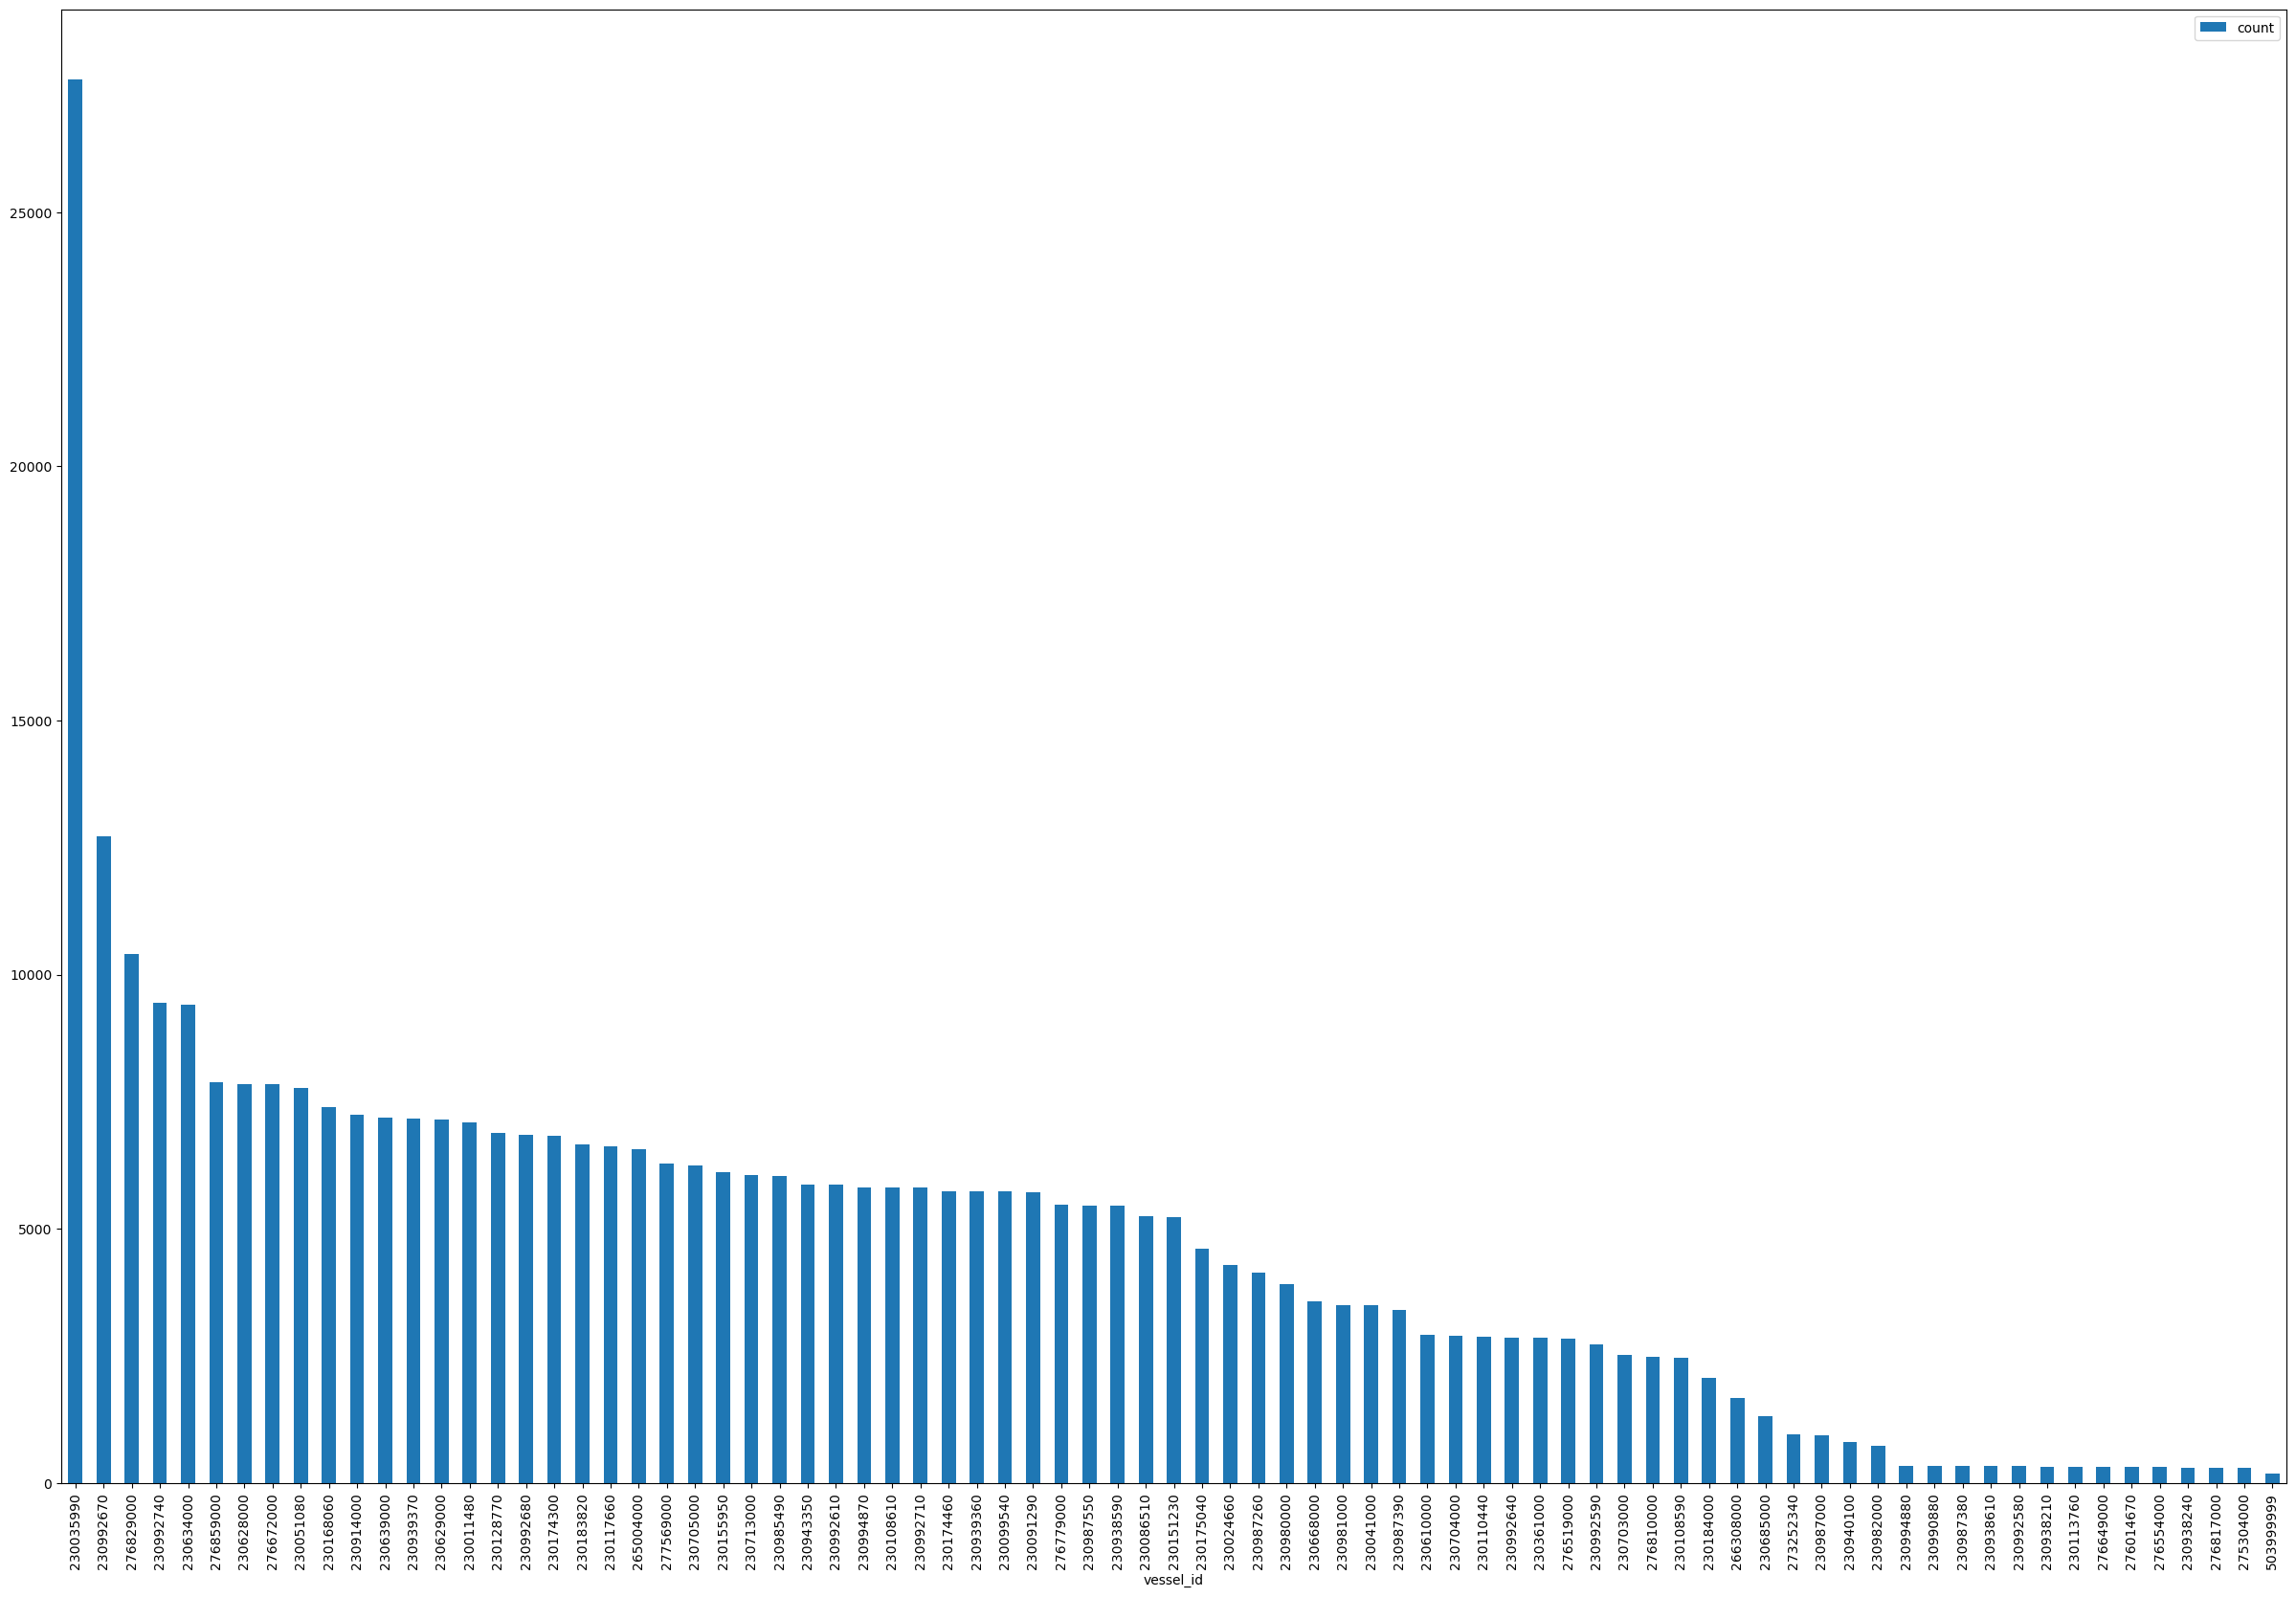

In [21]:
pd.DataFrame(df_60['vessel_id'].value_counts()).plot(kind='bar', figsize=(30,20))

In [22]:
df_60_1 = df_60[df_60['vessel_id'] == 230035990]

In [23]:
df_60_1.shape

(27614, 7)

In [24]:
df_60_1['latitude'].min()

60.290243

In [25]:
df_60_1['longitude'].min()

20.751505

In [26]:
df_60_1['latitude'].max()

60.318202

In [27]:
df_60_1['longitude'].max()

20.792033

In [28]:
df_60_1_lola = df = df_60_1.loc[(df_60_1['vessel_id'] >= 20), ["timestamp","latitude","longitude"]]
df_60_1_lola.shape

(27614, 3)

In [29]:
df_60_1_lola.head()

,timestamp,latitude,longitude
2,2025-02-26 07:31:57.723384,60.299975,20.789523
18,2025-02-26 07:31:54.993892,60.299905,20.789600
33,2025-02-26 07:31:52.945311,60.299835,20.789675
46,2025-02-26 07:31:50.956638,60.299765,20.789747
56,2025-02-26 07:31:48.640038,60.299693,20.789817


In [30]:
df_60_1_lola = df_60_1_lola.reset_index(drop=True)
df_60_1_lola.head()

,timestamp,latitude,longitude
0,2025-02-26 07:31:57.723384,60.299975,20.789523
1,2025-02-26 07:31:54.993892,60.299905,20.789600
2,2025-02-26 07:31:52.945311,60.299835,20.789675
3,2025-02-26 07:31:50.956638,60.299765,20.789747
4,2025-02-26 07:31:48.640038,60.299693,20.789817


In [31]:
# Convert 'timestamp' to datetime (if not already)
df_60_1_lola['timestamp'] = pd.to_datetime(df_60_1_lola['timestamp'], errors='coerce')

# Extract Date and Time separately
df_60_1_lola['Date'] = df_60_1_lola['timestamp'].dt.date
df_60_1_lola['Time'] = df_60_1_lola['timestamp'].dt.time

# Drop the original timestamp column
df_60_1_lola = df_60_1_lola.drop(columns=['timestamp'])

df_60_1_lola.head()

,latitude,longitude,Date,Time
0,60.299975,20.789523,2025-02-26,07:31:57.723384
1,60.299905,20.789600,2025-02-26,07:31:54.993892
2,60.299835,20.789675,2025-02-26,07:31:52.945311
3,60.299765,20.789747,2025-02-26,07:31:50.956638
4,60.299693,20.789817,2025-02-26,07:31:48.640038


In [32]:
df_60_1_lola.to_csv('df_60_1_lola.csv')

In [33]:
df_60_1_lola.head(-20)

,latitude,longitude,Date,Time
0,60.299975,20.789523,2025-02-26,07:31:57.723384
1,60.299905,20.789600,2025-02-26,07:31:54.993892
2,60.299835,20.789675,2025-02-26,07:31:52.945311
3,60.299765,20.789747,2025-02-26,07:31:50.956638
4,60.299693,20.789817,2025-02-26,07:31:48.640038
...,...,...,...,...
27589,60.290262,20.788342,2025-02-23,16:15:17.800540
27590,60.290262,20.788342,2025-02-23,16:15:15.702784
27591,60.290262,20.788342,2025-02-23,16:15:13.725716
27592,60.290262,20.788342,2025-02-23,16:15:11.811072


In [34]:
# Convert 'Date' column to datetime format
df_60_1_lola['Date'] = pd.to_datetime(df_60_1_lola['Date']).dt.date

# Debugging: Check unique values after conversion
print("Unique Dates:", df_60_1_lola['Date'].unique())

# Define the filter date properly
filter_date = pd.to_datetime('2025-02-26').date()

# Apply the filter
df_60_1_lola_p1 = df_60_1_lola[df_60_1_lola['Date'] == filter_date]

# Print the number of rows after filtering
print(f"Rows after filtering: {df_60_1_lola_p1.shape[0]}")

# Display result
if df_60_1_lola_p1.empty:
    print("No data available for the selected date.")
else:
    print(df_60_1_lola_p1.head(-5))  # Display all except last 5 rows

Unique Dates: [datetime.date(2025, 2, 26) datetime.date(2025, 2, 24)
 datetime.date(2025, 2, 23)]
Rows after filtering: 4591
       latitude  longitude        Date             Time
0     60.299975  20.789523  2025-02-26  07:31:57.723384
1     60.299905  20.789600  2025-02-26  07:31:54.993892
2     60.299835  20.789675  2025-02-26  07:31:52.945311
3     60.299765  20.789747  2025-02-26  07:31:50.956638
4     60.299693  20.789817  2025-02-26  07:31:48.640038
...         ...        ...         ...              ...
4581  60.290255  20.788367  2025-02-26  00:17:04.800046
4582  60.290255  20.788367  2025-02-26  00:17:02.893792
4583  60.290255  20.788367  2025-02-26  00:17:01.018406
4584  60.290255  20.788367  2025-02-26  00:16:59.050547
4585  60.290255  20.788367  2025-02-26  00:16:56.989075

[4586 rows x 4 columns]


In [35]:
df_60_1_lola_p1.shape

(4591, 4)

In [36]:
# Convert 'Date' to datetime format if not already done
df_60_1_lola['Date'] = pd.to_datetime(df_60_1_lola['Date']).dt.date

# Filter data for the specified date
filter_date = pd.to_datetime('2025-02-26').date()
df_60_1_lola_p2 = df_60_1_lola[df_60_1_lola['Date'] == filter_date]

# Sort by 'Time'
df_60_1_lola_p2 = df_60_1_lola_p2.sort_values(by="Time")

# Display first 10 rows
df_60_1_lola_p2.head(10)


,latitude,longitude,Date,Time
4590,60.290257,20.788367,2025-02-26,00:16:46.764445
4589,60.290257,20.788367,2025-02-26,00:16:48.781654
4588,60.290257,20.788367,2025-02-26,00:16:50.774488
4587,60.290255,20.788367,2025-02-26,00:16:52.785258
4586,60.290255,20.788367,2025-02-26,00:16:54.959572
4585,60.290255,20.788367,2025-02-26,00:16:56.989075
4584,60.290255,20.788367,2025-02-26,00:16:59.050547
4583,60.290255,20.788367,2025-02-26,00:17:01.018406
4582,60.290255,20.788367,2025-02-26,00:17:02.893792
4581,60.290255,20.788367,2025-02-26,00:17:04.800046


In [37]:
df_60_1_lola = pd.concat([df_60_1_lola_p1, df_60_1_lola_p2])
df_60_1_lola.head(10)

,latitude,longitude,Date,Time
0,60.299975,20.789523,2025-02-26,07:31:57.723384
1,60.299905,20.789600,2025-02-26,07:31:54.993892
2,60.299835,20.789675,2025-02-26,07:31:52.945311
3,60.299765,20.789747,2025-02-26,07:31:50.956638
4,60.299693,20.789817,2025-02-26,07:31:48.640038
5,60.299622,20.789882,2025-02-26,07:31:46.584400
6,60.299548,20.789945,2025-02-26,07:31:44.584847
7,60.299475,20.790003,2025-02-26,07:31:42.631419
8,60.299400,20.790060,2025-02-26,07:31:40.601344
9,60.299325,20.790117,2025-02-26,07:31:38.709432


In [38]:
df_60_1_lola.head(-10)

,latitude,longitude,Date,Time
0,60.299975,20.789523,2025-02-26,07:31:57.723384
1,60.299905,20.789600,2025-02-26,07:31:54.993892
2,60.299835,20.789675,2025-02-26,07:31:52.945311
3,60.299765,20.789747,2025-02-26,07:31:50.956638
4,60.299693,20.789817,2025-02-26,07:31:48.640038
...,...,...,...,...
14,60.298947,20.790380,2025-02-26,07:31:28.765986
13,60.299022,20.790332,2025-02-26,07:31:30.757572
12,60.299098,20.790280,2025-02-26,07:31:32.613900
11,60.299173,20.790227,2025-02-26,07:31:34.810704


In [39]:
df_60_1_lola.shape

(9182, 4)

In [40]:
df_60_1_lola_p1.shape

(4591, 4)

In [41]:
df_60_1_lola_p2.shape

(4591, 4)

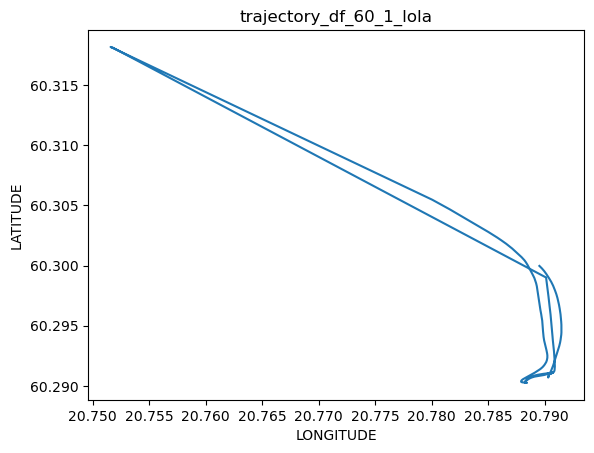

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_60_1_lola_p1.longitude, df_60_1_lola_p1.latitude)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('trajectory_df_60_1_lola')
plt.show()

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [44]:
cols = list(df_60_1_lola_p1)[:2]
cols

['latitude', 'longitude']

In [45]:
df_for_training = df_60_1_lola_p1[cols].astype(float)

In [46]:
df_for_training.shape

(4591, 2)

In [47]:
train_df=df_for_training[:-900]
test_df=df_for_training[-900:]

In [48]:
test_df.head()

,latitude,longitude
3691,60.290267,20.788353
3692,60.290265,20.788355
3693,60.290265,20.788355
3694,60.290267,20.788353
3695,60.290267,20.788353


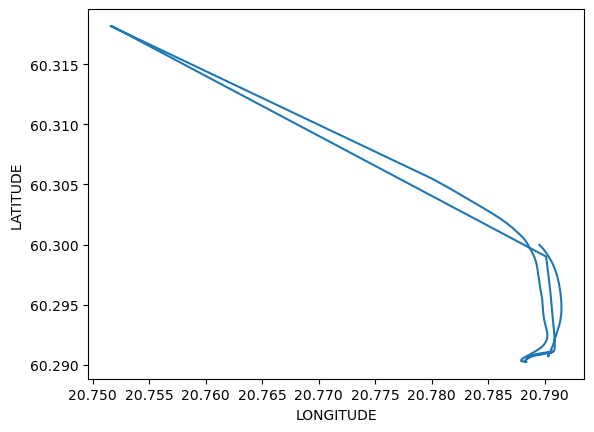

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_df.longitude, train_df.latitude)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

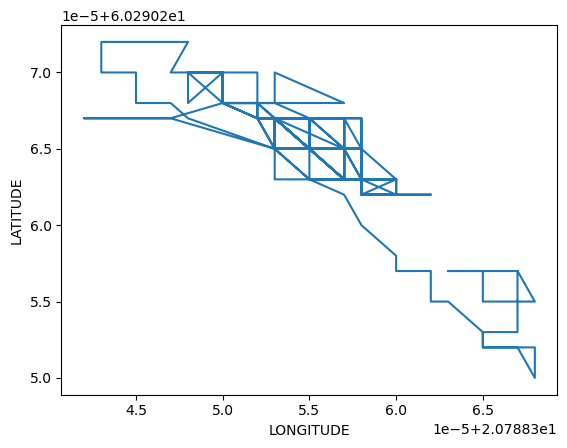

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_df.longitude, test_df.latitude)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.show()

In [51]:
model = VAR(train_df.diff()[1:])
var_model = VARMAX(train_df, order=(4,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                               Statespace Model Results                              
Dep. Variable:     ['latitude', 'longitude']   No. Observations:                 3691
Model:                                VAR(4)   Log Likelihood               55404.792
                                 + intercept   AIC                        -110767.583
Date:                       Wed, 19 Mar 2025   BIC                        -110637.097
Time:                               02:37:42   HQIC                       -110721.140
Sample:                                    0                                         
                                      - 3691                                         
Covariance Type:                         opg                                         
Ljung-Box (L1) (Q):             0.01, 8.85   Jarque-Bera (JB):   554421327.47, 217720144.65
Prob(Q):                        0.93, 0.00   Prob(JB):                           0.00, 0.00
Heteroskedasticity (H):         0.03, 0.01

In [52]:
n_forecast = 900
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
predictions=predict.predicted_mean

In [53]:
predictions.columns=['LAT_predicted','LON_predicted']
predictions

,LAT_predicted,LON_predicted
3691,60.290258,20.788374
3692,60.290250,20.788393
3693,60.290241,20.788413
3694,60.290234,20.788432
3695,60.290226,20.788450
...,...,...
4586,60.291308,20.788487
4587,60.291308,20.788487
4588,60.291309,20.788486
4589,60.291310,20.788486


In [54]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

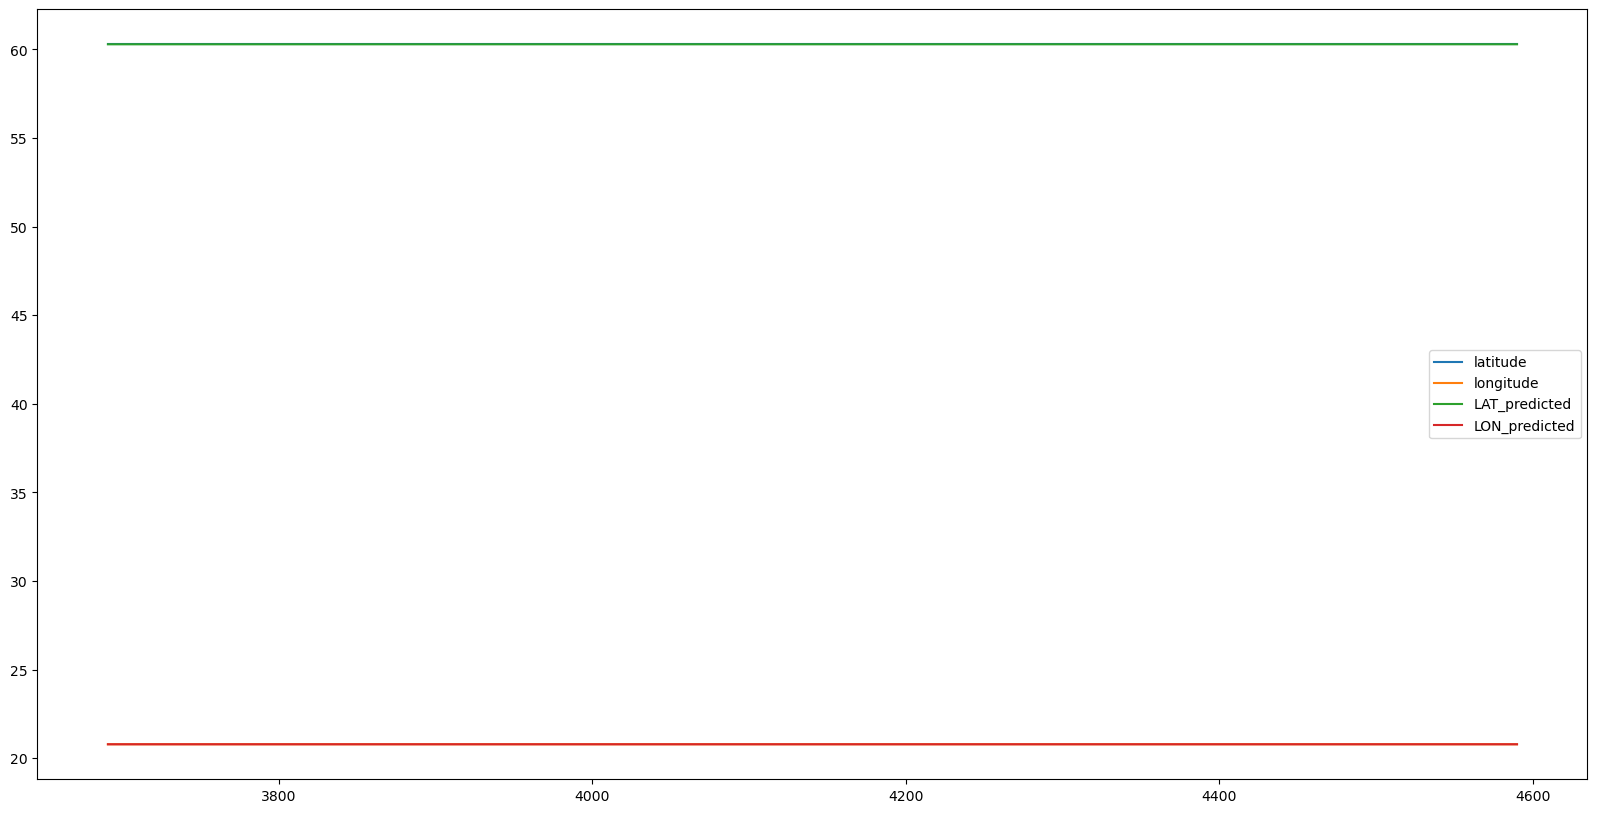

In [55]:
import matplotlib.pyplot as plt
test_vs_pred.plot(figsize=(20, 10))
plt.show()

In [56]:
test_vs_pred.columns

Index(['latitude', 'longitude', 'LAT_predicted', 'LON_predicted'], dtype='object')

In [57]:
test_vs_pred.columns

Index(['latitude', 'longitude', 'LAT_predicted', 'LON_predicted'], dtype='object')

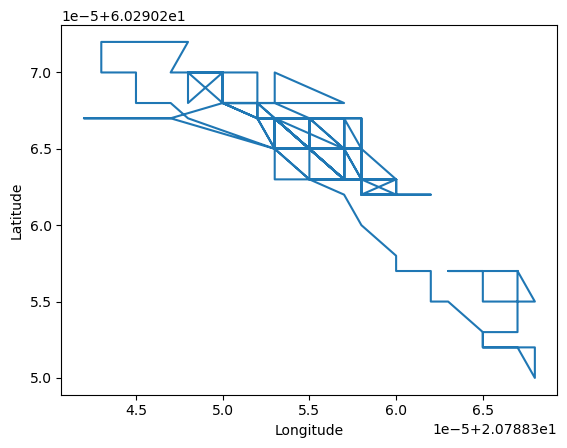

In [58]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(test_vs_pred.longitude, test_vs_pred.latitude)

# Set labels for the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


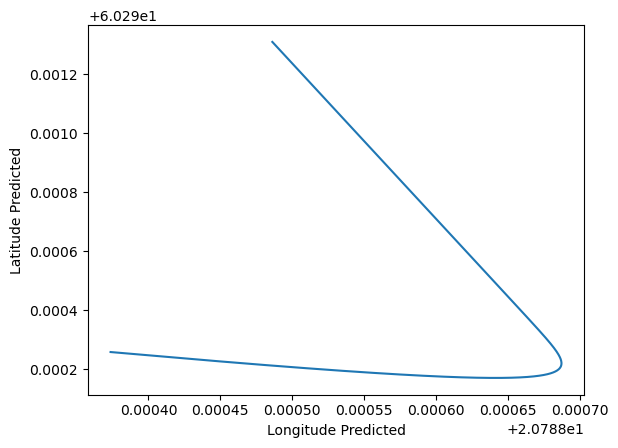

In [59]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(test_vs_pred.LON_predicted, test_vs_pred.LAT_predicted)

# Set labels for the axes
plt.xlabel('Longitude Predicted')
plt.ylabel('Latitude Predicted')

# Show the plot
plt.show()


In [69]:
import numpy as np

# Calculate the Euclidean distance between predicted and actual values
# (latitude, longitude) -> (LAT_predicted, LON_predicted)
distances = np.sqrt((test_vs_pred['LAT_predicted'] - test_vs_pred['latitude'])**2 + 
                    (test_vs_pred['LON_predicted'] - test_vs_pred['longitude'])**2)

# Set a threshold for accuracy
threshold = 0.01  # A threshold of 0.01 degrees is used, which is approximately equivalent to 1 km.

# Determine which predictions are accurate (i.e., distance <= threshold)
accurate_predictions = distances <= threshold

# Calculate the accuracy as the percentage of accurate predictions
accuracy = np.mean(accurate_predictions) * 100

# Print the accuracy
print(f"Prediction Accuracy: {accuracy:.2f}%")


Prediction Accuracy: 100.00%


In [70]:
import numpy as np

# Calculate the Euclidean distance between predicted and actual values
# (latitude, longitude) -> (LAT_predicted, LON_predicted)
distances = np.sqrt((test_vs_pred['LAT_predicted'] - test_vs_pred['latitude'])**2 + 
                    (test_vs_pred['LON_predicted'] - test_vs_pred['longitude'])**2)

# Set a threshold for accuracy
threshold = 0.001  # A threshold of 0.001 degrees is used, which is approximately equivalent to 10 km.

# Determine which predictions are accurate (i.e., distance <= threshold)
accurate_predictions = distances <= threshold

# Calculate the accuracy as the percentage of accurate predictions
accuracy = np.mean(accurate_predictions) * 100

# Print the accuracy
print(f"Prediction Accuracy: {accuracy:.2f}%")


Prediction Accuracy: 89.67%
